In [1]:
#importing imp libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset

df = pd.read_csv(r"C:\Users\ASUS\Desktop\blackFriday_train.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


By mere looking at the dataset, we will notice that the dataset contains both numerical and categorical variables. But we can't just conclude because some variables may not be the type we really think they are. The only way to find out is to get the information of the dataset.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


From the above information, the dataset is made up of 550068 rows and 12 columns. It is made up of numerical variables (integers and floats) and categorical variables (objects). The Purchase column is the output variable (label) while other columns are the input variables (features) We can spot null values (NaN) only in Product_Category_2 and Product_Category_3 features. We can verify further with some lines of codes.



Overview of the dataset

The dataset is made up of 550068 rows (number of transactions) and 12 columns. Columns are:

User ID: ID of customer.

Product ID: ID of product being purchased.

Gender: gender of the customer, M for male and F for female.

Age: age range of the customer.

Occupation: occupation of the customer.

City_Category: current city category the customer is living in.

Stay_In_Current_City_Years: how long the customer has lived in his/her current city.

Martal_Status: marital status of the customer, 1 for married and 0 for unmarried.

Product_Category (1, 2 and 3): category of products purchased. The values are the number of products purchased in that category.

Purchase (Labelor Target variable): purchase amount.


In [4]:
# Number of rows and columns of the dataset
df.shape

(550068, 12)

In [5]:
# Numerical variables
numeric_variables = df.select_dtypes(include=["number"])
numeric_variables.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
# Discriptive statistics of numerical variables
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# Number of null values in each variable
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Let's create a visual represenation of this with a heatmap



<AxesSubplot:>

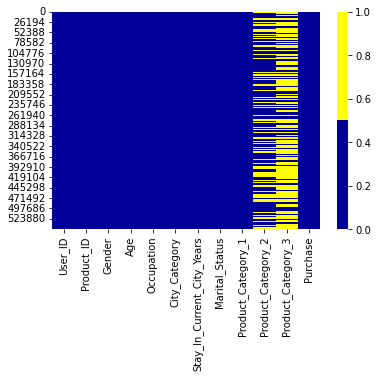

In [8]:
colors = ['#000099', '#ffff00'] #yellow is null while blue is not null
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))

In [9]:
# Percentage of null values in each variable
for col in df.columns:
    null_pct = (df[col].isnull().sum()*100)/len(df[col].index)
    print(f"{col} null percentage: {round(null_pct, 1)}%")

User_ID null percentage: 0.0%
Product_ID null percentage: 0.0%
Gender null percentage: 0.0%
Age null percentage: 0.0%
Occupation null percentage: 0.0%
City_Category null percentage: 0.0%
Stay_In_Current_City_Years null percentage: 0.0%
Marital_Status null percentage: 0.0%
Product_Category_1 null percentage: 0.0%
Product_Category_2 null percentage: 31.6%
Product_Category_3 null percentage: 69.7%
Purchase null percentage: 0.0%


Looking at the information above regarding the amount of null values in the variables, only Project_Category_2 and Project_Category_3 features contain null values of approximately 32% and 70% respectively. Product_Category_3 has much null values (70%). Before we perform any sort of replacement of the null values, there is a need to investigate why the null values.

Looking at the dataset, in Product IDfeature, each unique product ID has categories of products (i.e . Product_Category_1, Product_Category_2 and Product_Category_3) that can be purchased. The null values could be as a result of some product IDs don't have particular product category/categories or some customers chose not to buy certain categories of some product IDs. Therefore, it will be right to say there are some product IDs that don't have certain product category/categories or some customer chose not to buy certain product category/categories of some products (product IDs). Since the whole idea centers on "no", so let's replace the null values with 0 (zero).

Each value of any of the Product Category features (i.e. Product_Category_1, Product_Category_2 and Product_Category_3) is the number of products of a certain product (i.e. Product_ID) purchased in that category. Every customer that attended the sale purchased products that fall under Product_Category_1.



In [10]:
# Replacing null values with 0 
df.fillna(value=0, inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [11]:
# CHecking for null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [12]:
print(f"Product_Category_2 unique values: {df.Product_Category_2.unique()} \n")
print(f"Product_Category_3 unique values: {df.Product_Category_3.unique()}")

Product_Category_2 unique values: [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3 unique values: [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


We can see that no variable has null values and the null values in Product_Category_2 and Product_Category_3 have been replaced with 0.

Let's filter and store the variable types we have.



In [13]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
categorical = df.select_dtypes(include=object).columns.tolist()
print(f"Numerical variables: {numerical} \n")
print(f"Categorical variables: {categorical}")

Numerical variables: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'] 

Categorical variables: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


# Data Visualization/Analysis

Numerical Variables



Before we can do that, we need to first understand our variables. Let’s start with numerical variables, specifically our target variable, Purchase which, of course, it is a numerical variable.



<AxesSubplot:xlabel='Purchase', ylabel='Count'>

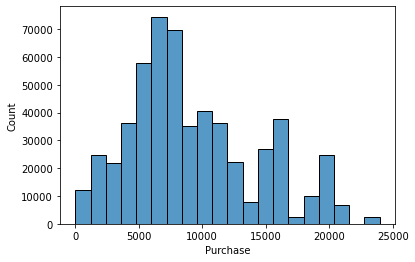

In [14]:
sns.histplot(df.Purchase, bins=20)

Taking a look at the histogram, we will observe that the highest purchase amount is between 5000 and 10000



array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Product_Category_1'}>],
       [<AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>,
        <AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>]],
      dtype=object)

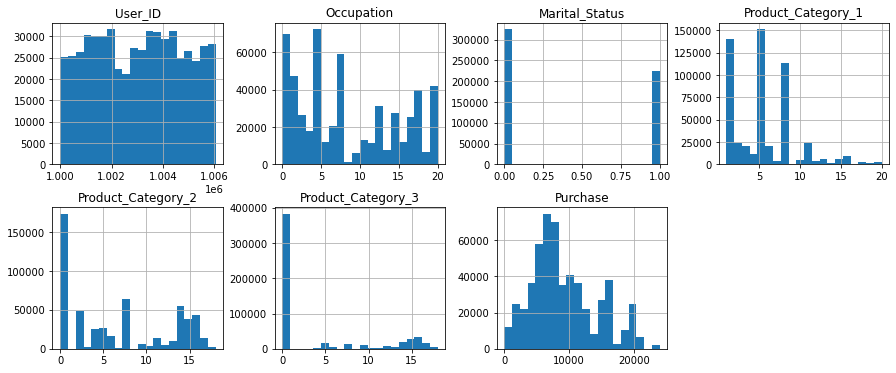

In [15]:
df[numerical].hist(bins=20, figsize=(15,6), layout=(2,4))

In Marital_Status, majority of the persons that attended the black firday sale are unmarried.



# Categorical Variables



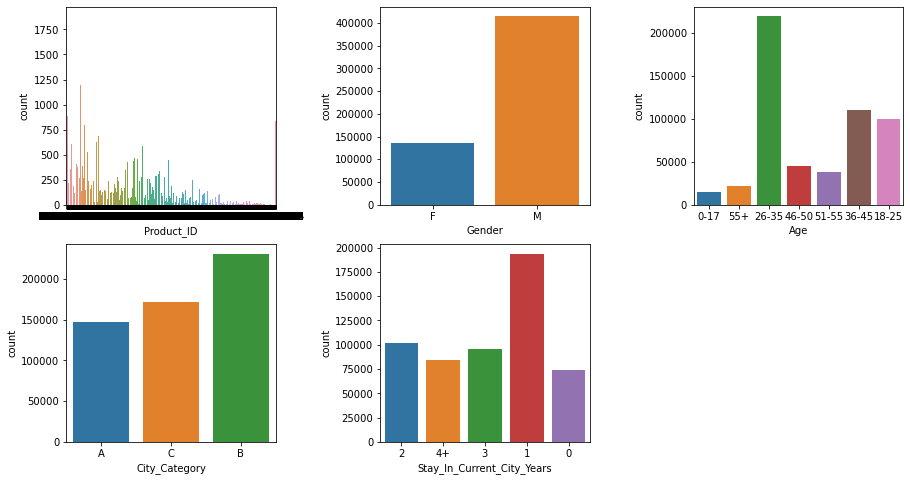

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
fig.delaxes(axes[1][2])
plt.subplots_adjust(wspace=0.5)
sns.countplot(x=categorical[0], data=df, ax=axes[0][0])
sns.countplot(x=categorical[1], data=df, ax=axes[0][1])
sns.countplot(x=categorical[2], data=df, ax=axes[0][2])
sns.countplot(x=categorical[3], data=df, ax=axes[1][0])
sns.countplot(x=categorical[4], data=df, ax=axes[1][1])

plt.show()    

We will get a lot of information from this visualization.

In Gender, the customers that made higher number of porchase are mostly males. It could be that the products sold were mainly needed by males or the females' purchased items are paid by their spouse.

In Age, customers of age range 26-35 made the highest number of purchase. The least are 0-17 and 55+; this could be due to age constraints or they are dependent customers especially customers of age range 0-17.

In City_Category, customers living in city B made the highest number of purchase.
In Stay_in_Current_City_Years customers that have stayed in any of the cities for a year made the highest number of purchase.


In [17]:
# Unique values count of categorical variables
for variable in categorical:
    print(f"Unique values count of {variable} feature:\n{df[variable].value_counts()}\n\n--------------------------------------------------")

Unique values count of Product_ID feature:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

--------------------------------------------------
Unique values count of Gender feature:
M    414259
F    135809
Name: Gender, dtype: int64

--------------------------------------------------
Unique values count of Age feature:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

--------------------------------------------------
Unique values count of City_Category feature:
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

--------------------------------------------------
Unique values count of Stay_In_Current_City_Years feature:
1     193821
2     101838
3      95285
4+     84726
0      74398
Name

Let's plot some relationships between the variables. This allows us to easily get a visual understanding of patterns and correlations and make inference from it.



<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

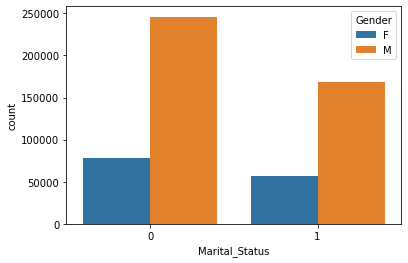

In [18]:
sns.countplot(x='Marital_Status',hue='Gender', data=df)

In both marital status, the male customers made most of the purchases.



In [19]:
# Unique values of Age feature
print(f"Age range of customers: {df.Age.unique()}")

Age range of customers: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


<AxesSubplot:xlabel='Age', ylabel='count'>

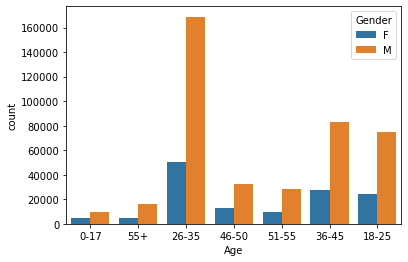

In [20]:
sns.countplot(x=df['Age'], hue=df['Gender'])

From the plot, majority customers that attended the sale are males in all the age ranges and the males of age range 26-35 made the highest appearance.

Let's find out, in each age range how many customers are married and unmarried.



<AxesSubplot:xlabel='Age', ylabel='count'>

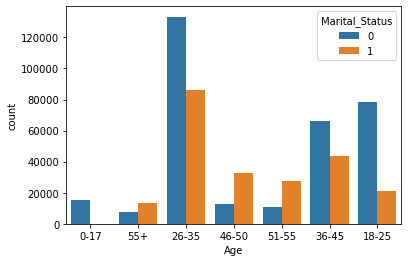

In [21]:
sns.countplot(x=df['Age'],hue=df['Marital_Status'])

As shown above, age range 0-17 has no married customer. This is understandable because it is rare for people to get married in that age range. Age range 26-35 has the highest appearance of married customers.



<AxesSubplot:xlabel='Age', ylabel='Purchase'>

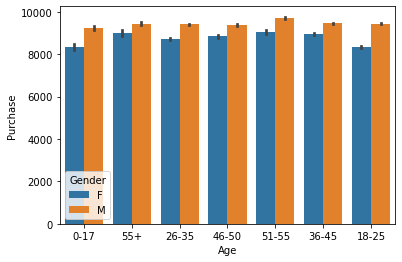

In [22]:
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)

Males in all age ranges made the highest total purchase amount



<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

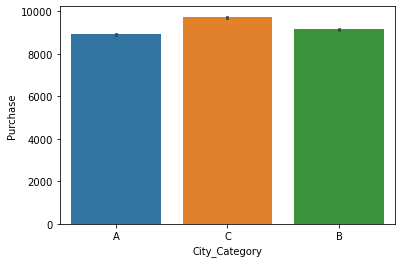

In [23]:
 sns.barplot(x="City_Category", y="Purchase", data=df)

Customers staying in city C has the highest total purchase amount.



<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

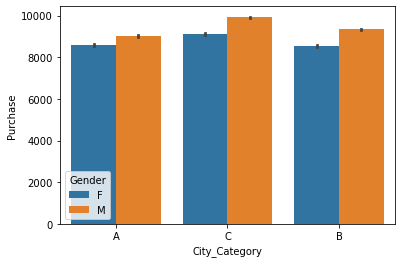

In [24]:
sns.barplot(x="City_Category", y="Purchase", hue="Gender", data=df)

All the male staying in all the cities made the total purchase amount.



In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In the User_ID, some of the values are identical. This means some customers made more than one purchase. We can use this information to know the number of unique persons that attended sale.



#### Now let's make analysis base on the number of unique persons that attended the Black Friday Sale.



In [26]:
df.User_ID.value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

From this data, 5891 unique persons attended the sale. All of them made more than one purchase. Customer with User ID 1001680 made the highest purchase while customer with User_ID 1000708 made the least purchase.



In [27]:
# Creating a table of unique persons(i.e. unique User_ID)
unique1 = df[df["User_ID"]==df.User_ID.unique()[0]] 
all_unique = unique1.head(1)
all_unique["Purchase_Count"] = list(unique1.User_ID.value_counts())

for id in df.User_ID.unique()[1:]:
    unique_id = df[df["User_ID"]==id].head(1)
    count = list(df[df["User_ID"]==id].User_ID.value_counts())
    unique_id["Purchase_Count"] = count
    all_unique = pd.concat([all_unique, unique_id]).reset_index(drop=True)
all_unique.drop(["Product_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"], axis=1, inplace=True)
all_unique.head()


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count
0,1000001,F,0-17,10,A,2,0,35
1,1000002,M,55+,16,C,4+,0,77
2,1000003,M,26-35,15,A,3,0,29
3,1000004,M,46-50,7,B,2,1,14
4,1000005,M,26-35,20,A,1,1,106


This is the table of the first five unique persons that attended the Black Friday Sale and the total number of times each of them made purchases (Purchase_Count column).



In [28]:
all_unique.Gender.value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Number of unique males and females that attended the sale. We can see that the males made the highest attendance during the sale. Let's visualize with a chart.



<AxesSubplot:xlabel='Gender', ylabel='count'>

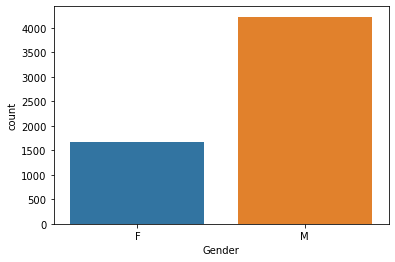

In [29]:
sns.countplot(x="Gender", data=all_unique)

<AxesSubplot:xlabel='Age', ylabel='count'>

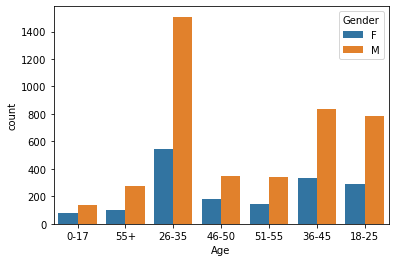

In [30]:
sns.countplot(x="Age", hue="Gender", data=all_unique)

The number of persons that attended the sale are mostly males in all age range; males in age range 26-35 attended mostly.

<AxesSubplot:xlabel='Age', ylabel='count'>

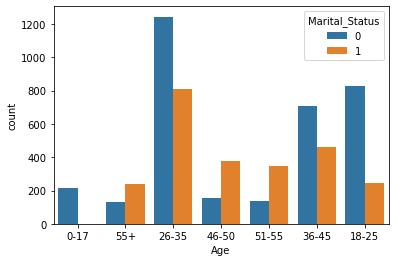

In [31]:
sns.countplot(x="Age", hue="Marital_Status", data=all_unique)

No married person of age range 0-17 atteneded the sale. The unmarried in age range 26-35 made the highest attendance.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

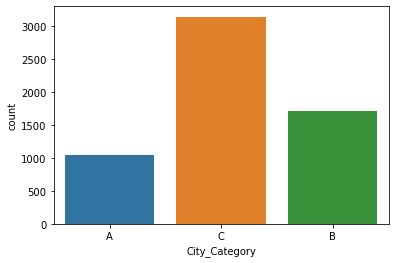

In [32]:
sns.countplot(x="City_Category", data=all_unique)

City C has the highest attandence during the sale.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

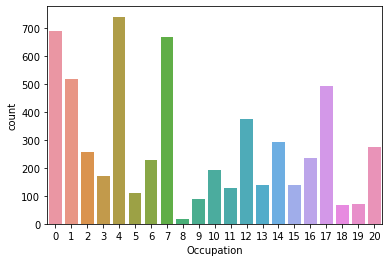

In [33]:
sns.countplot(x="Occupation", data=all_unique)

Most persons with occupation 4 attended the sale while the least are persons with occupation 8.

Let's find the top five customers that made the highest purchase

In [34]:
top_five = all_unique.sort_values(by="Purchase_Count", ascending=False).head()
top_five

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count
1488,1001680,M,26-35,20,A,3,1,1026
3772,1004277,M,36-45,16,A,0,0,979
1716,1001941,M,36-45,17,A,1,0,898
1049,1001181,M,36-45,7,A,3,1,862
790,1000889,M,46-50,20,A,1,0,823


The user ID of the top five customers with the highest purchase count are 1001680, 1004277, 1001941, 1001181 and 1000889 with purchase count (i.e. number of times each made purchase) of 1026, 979, 898, 862 and 823 respectively.

<AxesSubplot:xlabel='User_ID', ylabel='Purchase_Count'>

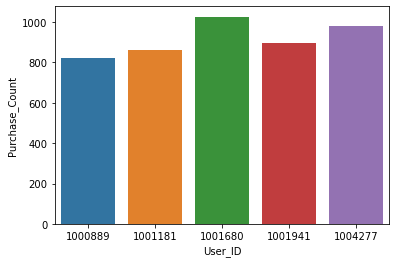

In [35]:
sns.barplot(x="User_ID", y="Purchase_Count", data=top_five)

Custumer with user ID 1001680 has the highest purchase count

From the dataset above, we can see the following about the top five customers by Purchase Count (number of times they made purchase):

They are all male customers. It looks like products sold during this black friday were needed mostly by the males.

First and fourth customers age ranges 26-35 and 46-50 respectively while others are 36-45.

Their occupations are 20, 16, 17, 7, 20 respectively.

They all stay in the same city (city A).

They have stayed in their current city (city A) for 3 years, 0 year, 1 year, 3 years and 1 year respectively.

The first and the fourth customers are married while others are not.

We can as well find the total purchase amount of every customer that attended the Black Friday Sale.



In [36]:
def formatNum(int):
    temp = str(int)[::-1]
    n = 0
    str1 = ""
    for i in temp:
        if n == 3: 
            str1 = str1+ ","+i
            n = 0
        else:
            str1 = str1+i
        n+=1
    return str1[::-1]
    
print(f"Total Amount Made During The Black Friday Sale: {formatNum(df.Purchase.sum())}")


Total Amount Made During The Black Friday Sale: 5,095,812,742


In [37]:
# Inserting a new column "Total_Purchase_Amount" in all_unique dataset
unique_id_total_purchase = all_unique
unique_id = df.User_ID.unique()
id_total=[]
for id in unique_id:
    id_total.append(df[df["User_ID"]==id].Purchase.sum())
unique_id_total_purchase["Total_Purchase_Amount"] = id_total
unique_id_total_purchase.head(5) 


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count,Total_Purchase_Amount
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001


First five rows of unique customers that attended the Black Friday Sale and the total amount each of them spent (Total_Purchase_Amount column) in purchasing products.

In [38]:
# Creating a table of maximum and minimum total purchase amount
max_purchase = unique_id_total_purchase.Total_Purchase_Amount.max()
min_purchase = unique_id_total_purchase.Total_Purchase_Amount.min()
max_info = unique_id_total_purchase[unique_id_total_purchase["Total_Purchase_Amount"]==max_purchase]
min_info = unique_id_total_purchase[unique_id_total_purchase["Total_Purchase_Amount"]==min_purchase]
max_and_min_data = pd.concat([max_info, min_info]).reset_index(drop=True)
max_and_min_data


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count,Total_Purchase_Amount
0,1004277,M,36-45,16,A,0,0,979,10536909
1,1004464,F,51-55,1,C,1,0,9,46681


From this table, customer with user ID 1004277 made the highest total purchase amount while 1004464 made the least total purchase amount.

In [39]:
# Top five by Total_Purchase_Amount
top_five = unique_id_total_purchase.sort_values(by="Total_Purchase_Amount", ascending=False)
top_five_purchase_amount = top_five.head()
top_five_purchase_amount


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count,Total_Purchase_Amount
3772,1004277,M,36-45,16,A,0,0,979,10536909
1488,1001680,M,26-35,20,A,3,1,1026,8699596
2555,1002909,M,26-35,7,A,1,0,718,7577756
1716,1001941,M,36-45,17,A,1,0,898,6817493
386,1000424,M,26-35,17,A,3,0,694,6573609


From this table, we can see that the total purchase amount of a customer is not being determined by the number of times that customer made purchases (Purchase_Count) but the type of products the customer purchased.

<AxesSubplot:xlabel='User_ID', ylabel='Total_Purchase_Amount'>

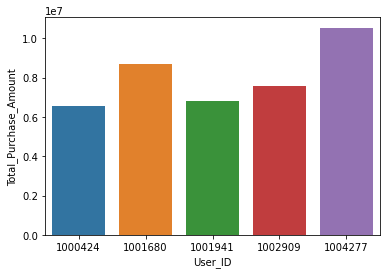

In [40]:
sns.barplot(x="User_ID", y="Total_Purchase_Amount", data=top_five_purchase_amount)

From the dataset above, we can see the following about the top five customers by Total_Purchase_Amount:

All the customers are males.

The first and the fourth customers age range is 36-45 while the rest is age range 26-35.

Their occupations are 16, 20, 7, 17 and 17 respectively.

They all stay in the same city (city A). The customer that made the highest number purchase and the customer that has the highest total purchase amount live in city A.

They have stayed in their current city (city A) for 0 years, 3 year, 1 year, 1 year and 3 years respectively.

They are all unmarried except the second customer.
